Text(0, 0.5, 'Diabetes Risk')

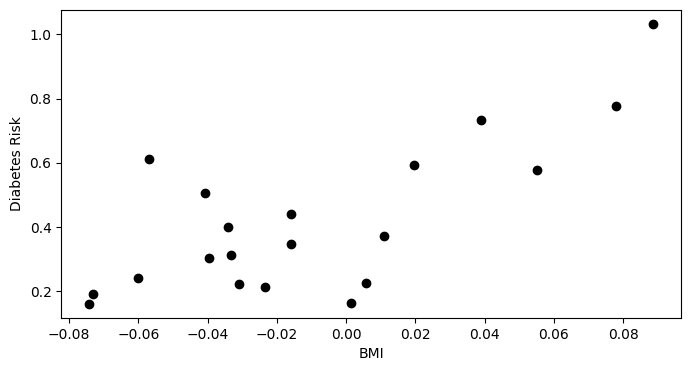

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('BMI')
plt.ylabel('Diabetes Risk')

In [ ]:
#dot product
def funt(X, theta):
  return X.dot(theta)

In [ ]:
#mean square error
def msre(theta,X,y):
  return 0.5*np.mean((y-funt(X,theta))**2)

In [ ]:
#gradient
def mgrad(theta,X,y):
  return np.mean((funt(X, theta)-y)*X.T, axis=1)

In [ ]:
#threshold = 0.001
#step_size = 0.4 #learning rate
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, msre(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mgrad(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701


Text(0, 0.5, 'Diabetes Risk')

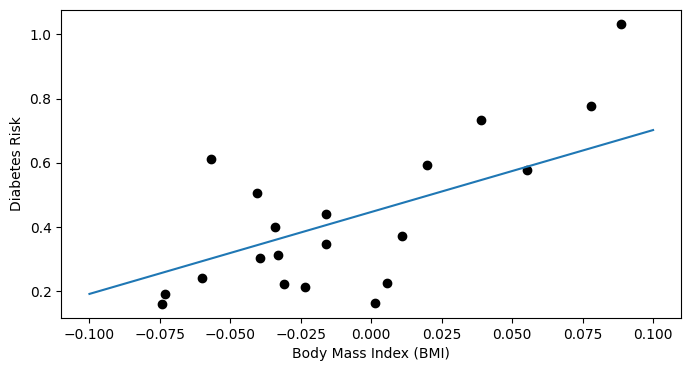

In [ ]:
#The final weights returned by the above algorithm yield a model
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.plot(x_line[0], y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')